# Proyek Analisis Data: [Dataset Bike ]
- **Nama:** [Figo Sanjaya]
- **Email:** [figosanjaya2675@gmail.com]
- **ID Dicoding:** [figo_sanjaya]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana Pengaruh Musim Terhadap Jumlah Penyewa Sepeda ?
- Pertanyaan 2 : Bagaimana Jumlah Perbandingan antara Pengguna Biasa dengan Member/Pengguna Terdaftar ?
- Pertanyaan 3 : Bagaimana pengaruh Hari Kerja dan Hari Libur Terhadap Penggunaan Sewa Sepeda ?

## Import Semua Packages/Library yang Digunakan

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [57]:
day_data = pd.read_csv ("day.csv")
day_data.head ()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [58]:
hour_data = pd.read_csv ("hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Tabel day_data

In [59]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [60]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [61]:
print ("Jumlah Duplikasi : ", day_data.duplicated().sum())

# Tidak ada missing value, duplikasi, semua kolom jumlahnya pas, tapi ada 1 tipe data object.

Jumlah Duplikasi :  0


In [62]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Tabel hour_data

In [63]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [64]:
print ("Jumlah Duplikasi : ", hour_data.duplicated().sum())
# Tidak ada duplikasi, missing value, jumlah data yang pas semua, tapi ada 1 tipe data object
# Dan casual nilai max nya tidak normal.

Jumlah Duplikasi :  0


In [65]:
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [66]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [67]:
# Menangani kesalahan tipe data pada hour_data dan day_data

day_data["dteday"] = pd.to_datetime(day_data["dteday"])

hour_data["dteday"] = pd.to_datetime(hour_data["dteday"])

In [68]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [69]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore day_data

In [70]:
day_data.sample (10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
615,616,2012-09-07,3,1,9,0,5,1,1,0.703333,0.657204,0.736250,0.171646,1045,6459,7504
538,539,2012-06-22,3,1,6,0,5,1,1,0.777500,0.724121,0.573750,0.182842,964,4859,5823
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
625,626,2012-09-17,3,1,9,0,1,1,2,0.580833,0.553050,0.734583,0.151742,1022,5847,6869
414,415,2012-02-19,1,1,2,0,0,0,2,0.280000,0.265788,0.515833,0.253112,618,2071,2689
180,181,2011-06-30,3,0,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312,1027,4488,5515
558,559,2012-07-12,3,1,7,0,4,1,1,0.715833,0.654683,0.529583,0.146775,1032,6414,7446
60,61,2011-03-02,1,0,3,0,3,1,1,0.335000,0.320071,0.449583,0.307833,231,1903,2134
559,560,2012-07-13,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850,1511,5988,7499
142,143,2011-05-23,2,0,5,0,1,1,2,0.631667,0.590296,0.810000,0.233842,836,3438,4274


In [71]:
day_data.describe (include = "all")

<ipython-input-71-884b98279db3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_data.describe (include = "all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


### Explore hour_data

In [72]:
hour_data.sample (10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4056,4057,2011-06-22,3,0,6,22,0,3,1,2,0.72,0.6970,0.79,0.1940,25,123,148
16617,16618,2012-11-30,4,1,11,4,0,5,1,1,0.22,0.2727,0.75,0.0000,0,3,3
10017,10018,2012-02-27,1,1,2,10,0,1,1,1,0.32,0.3030,0.45,0.2537,16,88,104
4034,4035,2011-06-22,3,0,6,0,0,3,1,1,0.66,0.6061,0.78,0.1940,15,18,33
3601,3602,2011-06-03,2,0,6,23,0,5,1,1,0.58,0.5455,0.46,0.1045,30,141,171
8576,8577,2011-12-29,1,0,12,3,0,4,1,1,0.20,0.1970,0.55,0.1940,0,2,2
14804,14805,2012-09-14,3,1,9,1,0,5,1,1,0.56,0.5303,0.73,0.0896,6,35,41
17290,17291,2012-12-28,1,1,12,7,0,5,1,1,0.22,0.2273,0.64,0.1642,1,111,112
3333,3334,2011-05-23,2,0,5,19,0,1,1,1,0.70,0.6667,0.74,0.2239,56,302,358
16877,16878,2012-12-11,4,1,12,0,0,2,1,3,0.46,0.4545,0.77,0.4627,2,29,31


In [73]:
def merge_data(day_data, hour_data):
  day_data = day_data.copy()
  hour_data = hour_data.copy()

  day_measure = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
  day_measure_dict = {x:f"{x}_day" for x in day_measure}
  day_data.rename(columns=day_measure_dict, inplace=True)

  drop_measure = [x for x in day_data.columns if x not in day_measure_dict.values()]
  drop_measure.remove('dteday')
  day_data.drop(drop_measure, axis=1, inplace=True)

  Data_merge = pd.DataFrame(hour_data.merge(day_data, on="dteday", how="left"))

  return Data_merge

Data_merge = merge_data(day_data, hour_data)
Data_merge

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,3,13,16,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,8,32,40,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,5,27,32,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,3,10,13,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,1,1,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,11,108,119,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,8,81,89,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,7,83,90,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,13,48,61,0.215833,0.223487,0.577500,0.154846,439,2290,2729


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana Pengaruh Musim Terhadap Jumlah Penyewa Sepeda ?


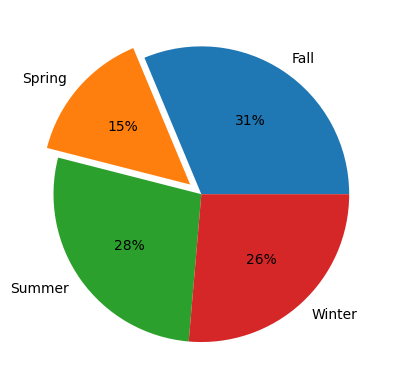

In [74]:
Mengkonversi_Season = {
    1:'Spring',
    2:'Summer',
    3:'Fall',
    4:'Winter',
}

def plot_season(Data:pd.DataFrame, col='cnt'):
  Data = Data.copy()
  Data['season'] = Data['season'].apply(lambda x : Mengkonversi_Season[x])
  Data = Data.groupby('season').mean(numeric_only=True)[col]

  plt.pie(Data, labels=Data.index, autopct='%.0f%%', explode = [0, 0.1, 0, 0])

plot_season(Data_merge)

### Pertanyaan 2: Bagaimana Jumlah Perbandingan antara Pengguna Biasa dengan Member/Pengguna Terdaftar ?


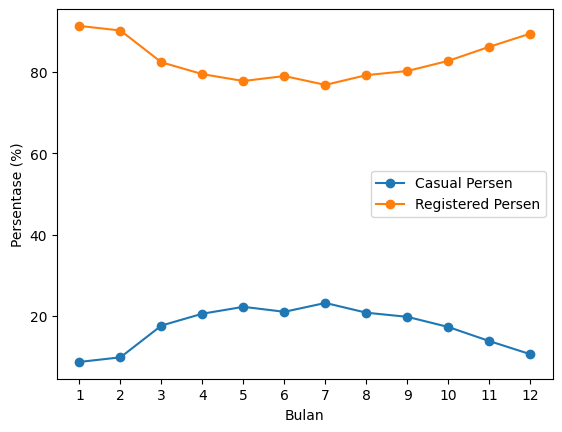

In [75]:
def plot_user_mode_alternative(Data):
    Data_copy = Data.copy()

    Data_copy['casual_Persen'] = (Data_copy['casual'] / Data_copy['cnt']) * 100
    Data_copy['registered_Persen'] = (Data_copy['registered'] / Data_copy['cnt']) * 100

    Data_casual_Bulanan = Data_copy.groupby('mnth')['casual_Persen'].mean()
    Data_registered_Bulanan = Data_copy.groupby('mnth')['registered_Persen'].mean()

    fig, ax = plt.subplots()
    Data_casual_Bulanan.plot(ax=ax, label='Casual Persen', marker='o')
    Data_registered_Bulanan.plot(ax=ax, label='Registered Persen', marker='o')

    ax.set_xticks(Data_casual_Bulanan.index)
    ax.set_xlabel('Bulan')
    ax.set_ylabel('Persentase (%)')
    ax.legend()
    plt.show()

plot_user_mode_alternative(Data_merge)

### Pertanyaan 3 : Bagaimana pengaruh Hari Kerja dan Hari Libur Terhadap Penggunaan Sewa Sepeda ?

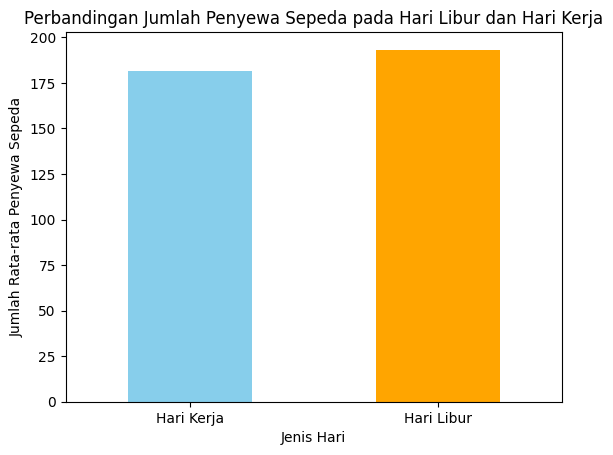

In [76]:
def plot_perbandingan_penyewa(Data_merge):
    Data_copy = Data_merge.copy()

    # Mengelompokkan berdasarkan 'workingday' dan menghitung rata-rata 'cnt'
    perbandingan_penyewa = Data_copy.groupby('workingday')['cnt'].mean()

    # Plot bar untuk menunjukkan perbandingan
    fig, ax = plt.subplots()
    perbandingan_penyewa.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])

    ax.set_xticklabels(['Hari Kerja', 'Hari Libur'], rotation=0)
    ax.set_xlabel('Jenis Hari')
    ax.set_ylabel('Jumlah Rata-rata Penyewa Sepeda')
    ax.set_title('Perbandingan Jumlah Penyewa Sepeda pada Hari Libur dan Hari Kerja')
    plt.show()

# Penggunaan
plot_perbandingan_penyewa(Data_merge)


In [77]:
!pip show numpy
!pip show pandas
!pip show matplotlib
!pip show seaborn
!pip install streamlit
import streamlit as st
!pip show streamlit

Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cufflinks, cupy-cuda12x, cvxpy, datascience, db-dtypes, dopamine-rl, ecos, flax, folium, geemap, gensim, gym, h5py, holoviews, hyperopt, ibis-framework, imageio, imbalanced-learn, imgaug, jax, jaxlib, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, optax, orbax-checkpoint, osqp, pandas, pandas-gbq, patsy, plotnine, prophet, pyarrow, pycocotools, pydeck, pyerfa, pymc, pytensor, python-louvain, PyWavelets, qdldl, qudida, scikit-image, scikit-learn, scipy, scs, seaborn, shapely,

In [78]:
Data_merge.to_csv("all_data.csv", index=False)

## Conclusion

- Kesimpulan pertanyaan 1 : Terlihat bahwa musim mempengaruhi jumlah penyewa sepeda. Musim gugur mempunyai persentase yang tinggi dan persentase paling rendah adalah musim semi. Untuk itu, jika ingin menggait banyak penyewa sepeda maka promosi dan jumlah sepeda yang akan disewakan harus ditingkatkan pada musim gugur, musim panas dan musim dingin. Musim panas dan musim dingin disertakan karena persentasenya tidak terlalu jauh dengan musim gugur, kecuali jika perbandingan persentasenya melebihi 5% maka bisa dipikirkan kembali dengan menimbang aspek lain apakah musim panas dan musim dingin juga harus ditingkatkan jumlah sepeda yang disewakan atau tidak.

- Kesimpulan pertanyaan 2 : Tidak aneh bila jumlah penyewa member/terdaftar mempunyai persentase lebih besar karena jumlahnya saja lebih banyak daripada penyewa biasa. Namun yang harus dilihat adalah kenaikan dan penurunan persentase pada setiap bulan. Antara penyewa member dan penyewa biasa seperti 2 sisi berlawanan karena titik/persentase terendah dari penyewa biasa merupakan titik/persentase tertinggi dari penyewa member. Untuk menggait penyewa yang lebih banyak maka promosi dan jumlah sepeda harus ditingkatkan pada bulan-bulan pertengahan tahun untuk penyewa biasa, sehingga bila pengguna biasa tertarik akan berkemungkinan menjadi penyewa member sehingga otomatis meningkatkan persentase penyewa member pada pertengahan tahun karena pada waktu tersebut penyewa member mengalami pemerosotan.

- Kesimpulan Pertanyaan 3 : jumlah penyewa secara total (penyewa biasa dan penyewa member) lebih banyak pada weekend/hari libur. Untuk itu promosi dan jumlah sepeda harus ditingkatkan pada hari libur agar meningkatkan jumlah penyewa.